In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [237]:
#loading the data and loosing all Null values
df = pd.read_csv(r'framingham_heart_disease.csv')
df = df[['male','age','totChol','glucose','heartRate']]
original_size = df.shape[0]
df.dropna(how='any', inplace=True)
no_null_size = df.shape[0]
df.insert(loc=0,column='intercept',value=1)
print(f'Data size after dropping Null values is'
      f' {no_null_size/original_size * 100:0.3}% of the original data size')

Data size after dropping Null values is 90.6% of the original data size


In [238]:
# defining function to check age
def age_groups(age):

    if age<40:
        return "young"

    elif 40<= age <60 :
        return "middle-aged"

    else:
        return "old"

df['ageGroup'] = df['age'].apply(age_groups)

df['gender'] = df['male'].apply(lambda x: "male" if x==1 else "female")


In [239]:
#Randomlly pick 200 samples from the data
#male-to-female difference won't exceed 10%
np.random.seed(25)
sample_size = 200
flag=True
while flag: #will take another sample if there is one sex only
    sample = df.sample(200)
    counts_gender = sample[['male', 'heartRate']].groupby('male').count()
    male_count = counts_gender['heartRate'][1]
    female_count = counts_gender['heartRate'][0]
    if female_count != 0 and male_count != 0 :
        if abs(female_count - male_count) <= sample_size*0.1:
            flag = False

ageGroup     gender
middle-aged  female    80
             male      72
old          female    16
             male      12
young        female     7
             male      13
Name: ageGroup, dtype: int64

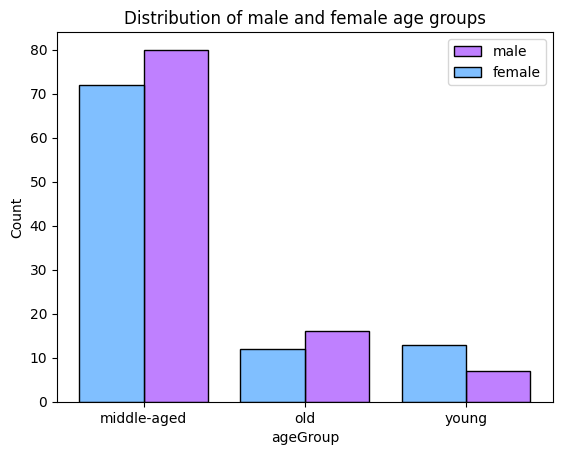

In [240]:
sns.histplot(data=sample, x="ageGroup", hue="gender", multiple="dodge", shrink=.8, palette="cool")
plt.legend(['male','female'])
plt.title("Distribution of male and female age groups")
sample.groupby(['ageGroup', 'gender'])['ageGroup'].count()

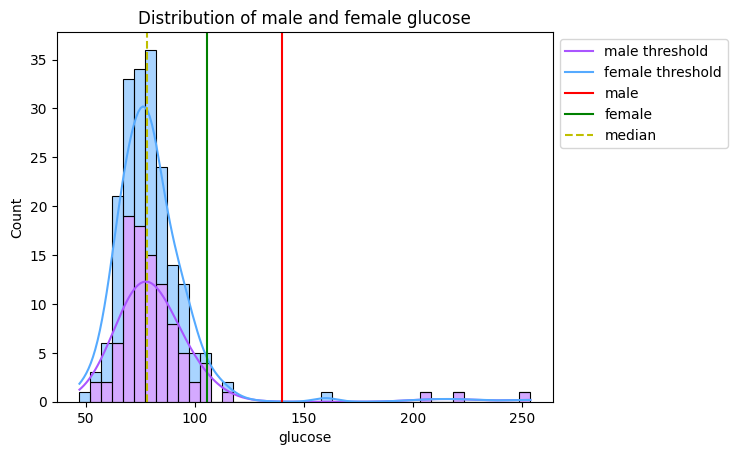

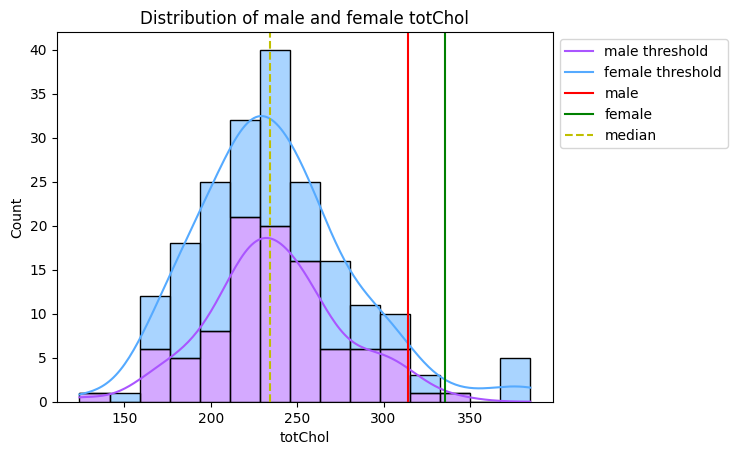

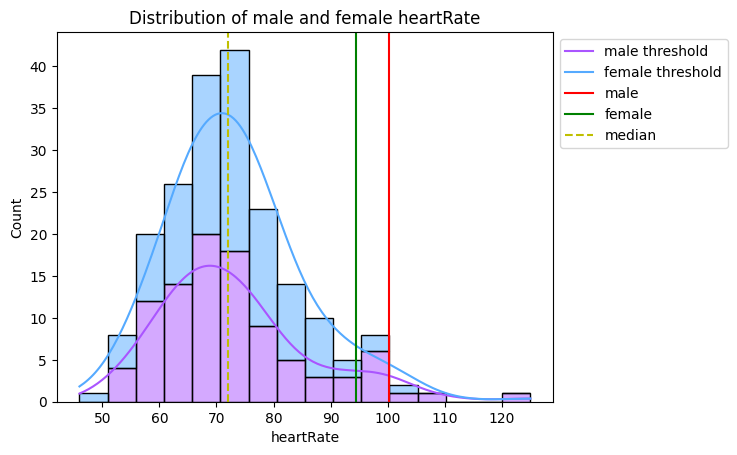

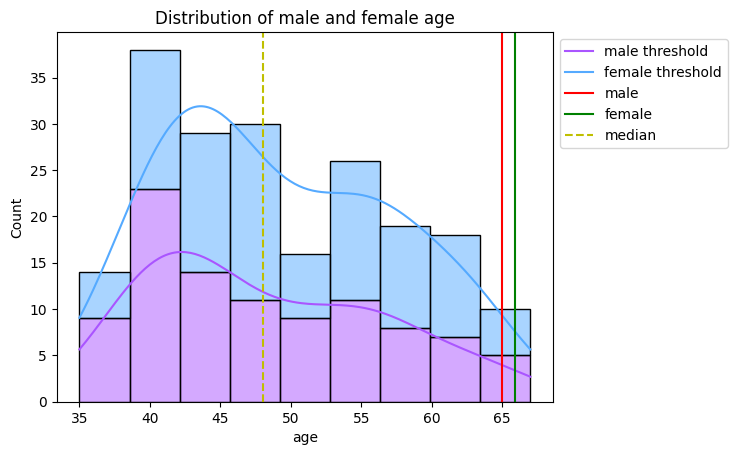

In [241]:
#ploting the distributions of all x values
#The thresholds indicate the "abnormal" values
variables = ['glucose','totChol','heartRate','age']
medians = {x:[np.median(sample[x])] for x in variables}
thresholds = {}
for x in variables:
    male_std = np.std(sample[sample['male']==1][x])
    female_std = np.std(sample[sample['male']==0][x])
    male_mean = np.mean(sample[sample['male']==1][x])
    female_mean = np.mean(sample[sample['male']==0][x])
    male_threshold = male_mean + 2*male_std
    female_threshold = female_mean + 2*female_std
    thresholds[x] = [male_threshold,female_threshold]
    sns.histplot(data=sample, x=x, hue="male", multiple="stack", palette="cool",kde=True)
    plt.legend(['male', 'female'])
    plt.title(f'Distribution of male and female {x}')
    plt.axvline(x = male_threshold, color = 'r', label = 'male threshold')
    plt.axvline(x = female_threshold, color = 'g', label = 'female threshold')
    plt.axvline(x = medians[x], color = 'y', ls='--', label = 'median')
    plt.legend(['male threshold','female threshold','male', 'female','median'],
               bbox_to_anchor = (1.0, 1), loc = 'upper left')
    plt.show()

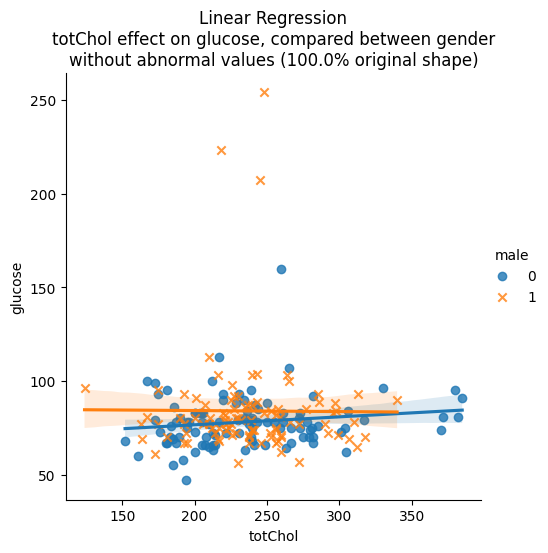

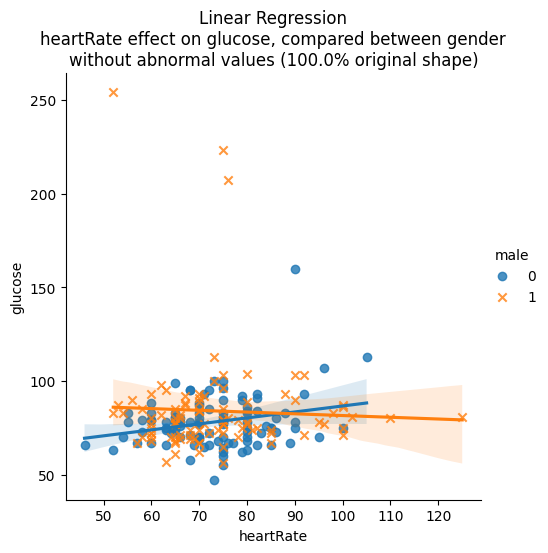

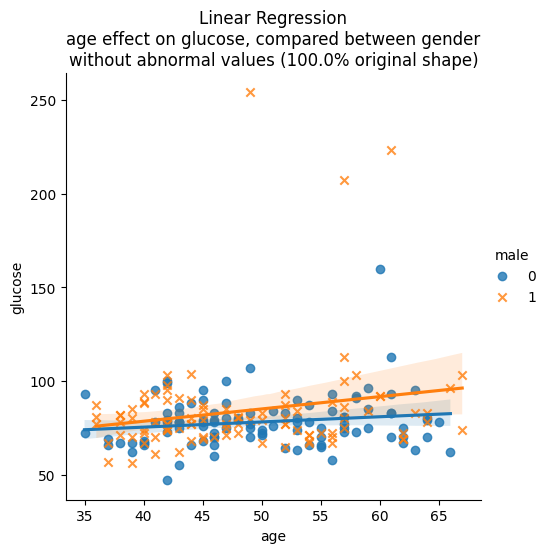

In [242]:
X_variables = ['totChol','heartRate','age']
y_var='glucose'
# y_normal = np.mean(sample[y]) + 2*np.std(sample[y])
y_sick = 300
normal_sample = sample[sample[y_var]<=y_sick]
normal_size_ratio = (normal_sample.shape[0]/sample.shape[0]) * 100
for x in X_variables:
    sns.lmplot(data=normal_sample, x=x, y=y_var, hue='male',
             markers=['o', 'x'])
    plt.title(f"Linear Regression\n"
              f"{x} effect on {y_var}, compared between gender"
              f"\nwithout abnormal values ({normal_size_ratio}% original shape)")
    plt.show()

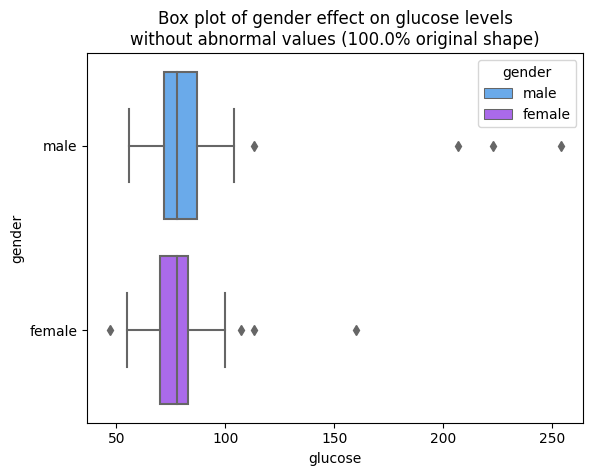

In [243]:
sns.boxplot(data=normal_sample, x='glucose', y='gender',
            orient='h',hue='gender',palette='cool',dodge=False)
plt.title(f"Box plot of gender effect on {y_var} levels"
          f"\nwithout abnormal values ({normal_size_ratio}% original shape)")
plt.show()

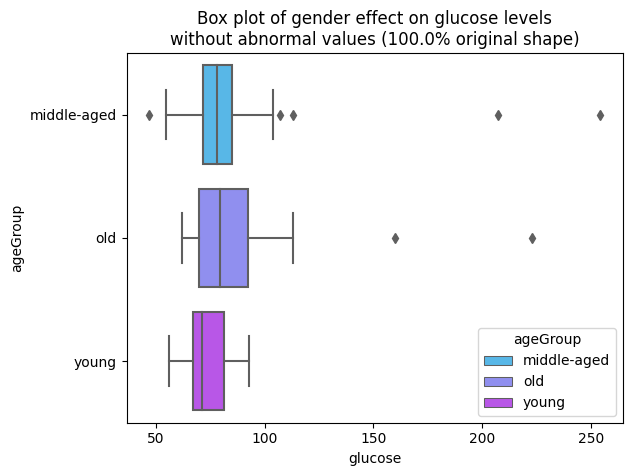

In [244]:
sns.boxplot(data=normal_sample, x='glucose', y='ageGroup',
            orient='h',palette='cool',dodge=False,hue='ageGroup')
plt.title(f"Box plot of gender effect on {y_var} levels"
          f"\nwithout abnormal values ({normal_size_ratio}% original shape)")
plt.show()

In [245]:
def calculate_beta(X,y):
    # Calculate MLE
    C = np.matmul(X.T, X)
    C_inv = np.linalg.inv(C)
    C_inv_X = np.matmul(C_inv, X.T)
    beta = np.matmul(C_inv_X, y)
    return np.round(beta,4)

In [246]:
#Q4
def model_display(data):
    X = data[['intercept','male',*X_variables]].to_numpy()
    y = data[y_var].to_numpy()
    beta = calculate_beta(X,y)
    print('Linear regression model is:\n'
          f'y = {beta[0]} + ({beta[1]})*x_1 + ({beta[2]})*x_2 + ({beta[3]})*x_3 + ({beta[4]})*x_4\n'
          f's.t:\n'
          f'y = glucose\n'
          f'x_1 = gender. '
          f'Value of 1(male) increases the y value by {beta[1]}\n'
          f'x_2 = totChol. '
          f'Increment of one unit in x_2 increases the y value by {beta[2]}\n'
          f'x_3 = heartRate. '
          f'Increment of one unit in x_3 increases the y value by {beta[3]}\n'
          f'x_4 = age. '
          f'Increment of one unit in x_4 increases the y value by {beta[4]}\n')
    return X,beta,y

In [247]:
#Q3
print(f'Data:= {sample_size} sampled data points from the original dataset')
X_sample,beta_sample,y_sample = model_display(sample)

Data:= 200 sampled data points from the original dataset
Linear regression model is:
y = 51.1365 + (6.6289)*x_1 + (0.0022)*x_2 + (0.0469)*x_3 + (0.4607)*x_4
s.t:
y = glucose
x_1 = gender. Value of 1(male) increases the y value by 6.6289
x_2 = totChol. Increment of one unit in x_2 increases the y value by 0.0022
x_3 = heartRate. Increment of one unit in x_3 increases the y value by 0.0469
x_4 = age. Increment of one unit in x_4 increases the y value by 0.4607



In [248]:
import scipy.stats as stats
#Q5
y = np.array(y_sample)
n = len(y_sample)
p = X_sample.shape[1]
y_pred = np.matmul(X_sample, beta_sample)
y_n = y.mean()
SSR = 0
SST = 0
SSres = 0
for i in range(n):
    SSR += (y_pred[i] - y_n)**2
    SST += (y[i] - y_n)**2
    SSres += (y[i] - y_pred[i])**2
Sum_Sq = [SSR, SSres, SST]
MSR = SSR / (p - 1)
MSres = SSres / (n - p)
MST = SST / (n - 1)
F_test = MSR / MSres
p_value = 1 - stats.f.cdf(F_test, p - 1, n - p)
F_list = f'p-value = {round(p_value,3)}, F = {round(F_test,3)}'
dof = [p - 1, n - p, n - 1]
MS = [MSR, MSres, MST]
anova_table = pd.DataFrame({'Sum of Squares': Sum_Sq, 'dof': dof, 'MS': MS, 'F': ''})
anova_table.loc[0, "F"] = F_list
anova_table.index = ['Regression', 'Residual/Errors', 'Total']
anova_table

,Sum of Squares,dof,MS,F
Regression,4666.684696,4,1166.671174,"p-value = 0.048, F = 2.448"
Residual/Errors,92952.121057,195,476.677544,
Total,97618.955000,199,490.547513,


In [249]:
SSR = anova_table.loc['Regression', 'Sum of Squares']
SST = anova_table.loc['Total', 'Sum of Squares']
R_squared = SSR / SST
print(f'R squared = {R_squared:.3}')

MSres = anova_table.loc['Residual/Errors', 'MS']
MST = anova_table.loc['Total', 'MS']
R_squared_adj = 1 - (MSres / MST)
print(f'R squared adj = {R_squared_adj}')

R squared = 0.0478
R squared adj = 0.028274465418098416


In [250]:
def calc_CI(X,y,beta_sample,beta_all,x_variables):
    n = X.shape[0]
    p = X.shape[1]
    C = np.linalg.inv(np.matmul(X.T,X))
    e = y - np.matmul(X, beta_sample)
    var_estimate = (1/(n-p))*sum([x**2 for x in e])
    z = stats.norm.ppf(0.975)
    for i, variable in enumerate(x_variables):
        std_estimate = np.sqrt(var_estimate*(C[i][i]))
        CI_beta_i = [beta_sample[i] - z*std_estimate, beta_sample[i] + z*std_estimate]
        print(f"CI for beta_{i} is: {CI_beta_i}")
        print(f"The CI of {'gender' if variable=='male' else variable} in the sample data contains the estimator of the original data:"
                f" {CI_beta_i[0] <= beta_all[i] <= CI_beta_i[1]}\n")

In [251]:
#Q6
print(f'Data:= original dataset')
X_all,beta_all,y_all = model_display(df)
calc_CI(X_sample,y_sample,beta_sample,beta_all,['intercept','male',*X_variables])


Data:= original dataset
Linear regression model is:
y = 48.9638 + (1.0621)*x_1 + (0.0037)*x_2 + (0.1949)*x_3 + (0.3397)*x_4
s.t:
y = glucose
x_1 = gender. Value of 1(male) increases the y value by 1.0621
x_2 = totChol. Increment of one unit in x_2 increases the y value by 0.0037
x_3 = heartRate. Increment of one unit in x_3 increases the y value by 0.1949
x_4 = age. Increment of one unit in x_4 increases the y value by 0.3397

CI for beta_0 is: [22.973460246114687, 79.29953975388531]
The CI of intercept in the sample data contains the estimator of the original data: True

CI for beta_1 is: [0.5358961383072822, 12.721903861692716]
The CI of gender in the sample data contains the estimator of the original data: True

CI for beta_2 is: [-0.06831190946196775, 0.07271190946196773]
The CI of totChol in the sample data contains the estimator of the original data: True

CI for beta_3 is: [-0.20523148918448403, 0.299031489184484]
The CI of heartRate in the sample data contains the estimator of 

#Q7
The hypotheses are :
$$
H_0 : \beta^{*}_0 =..= \beta^{*}_4 = 0  \\
H_1 : \exists \beta^{*}_j \neq 0,\quad j\in \{1,..,4\} \\
T.S. : F = \frac{MS_R}{MS_{Res}} \\
R.R. : F > F_{(\alpha,k,n-p)}
$$

In [252]:
F_val  = 1-stats.f.cdf(0.95, p-1, n-p)
decision = 'reject' if F_test>F_val else 'dont reject'
print(f'We {decision} H0 with alpha=0.95')

We reject H0 with alpha=0.95


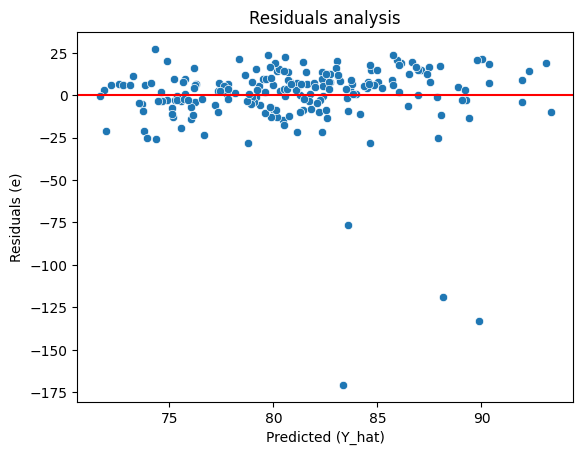

In [253]:
from statsmodels.graphics.gofplots import qqplot
#Q8
#Linearity check
e = y_pred - y_sample
sns.scatterplot(x=y_pred,y=e)
plt.axhline(y=e.mean(), color = "red", label = "residuals mean value")
plt.xlabel('Predicted (Y_hat)')
plt.ylabel('Residuals (e)')
plt.title('Residuals analysis')
plt.show()


We can see that E(e)~0 (the red line), so the linearity assumption is true in our model.
From the constant 'amplitude' of the residuals around E(e) we can infer that the constant variance assumption is also true.
There are some unusual\deviated points, but they are only few of those

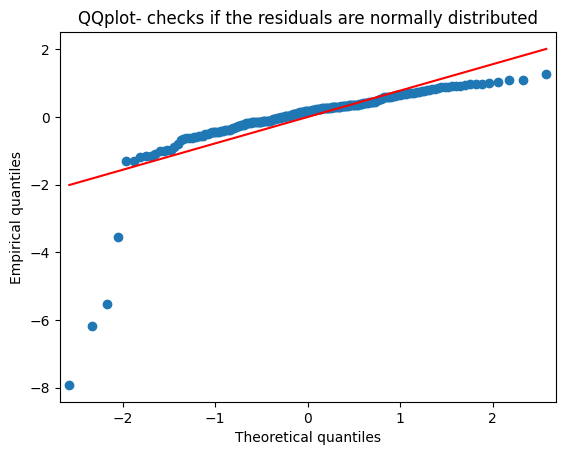

In [254]:
#QQplot-checking if the residuals are normally distributed
qqplot(e,stats.norm,fit=True,line='r')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Empirical quantiles')
plt.title('QQplot- checks if the residuals are normally distributed')
plt.show()

The points are distributed almost linearly around the red line,
so we can infer that the residuals are normally distributed.

In [255]:
new_df = df[~df.isin(sample)].dropna(how = 'all')
